## Load an image

In [1]:
from image import load
from pathlib import Path

# Office PC
file_path = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"

# Personal laptop
#file_path = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"

cal_image = load(file_path, for_calib = True)

### Get calibration

Number of images detected: 9


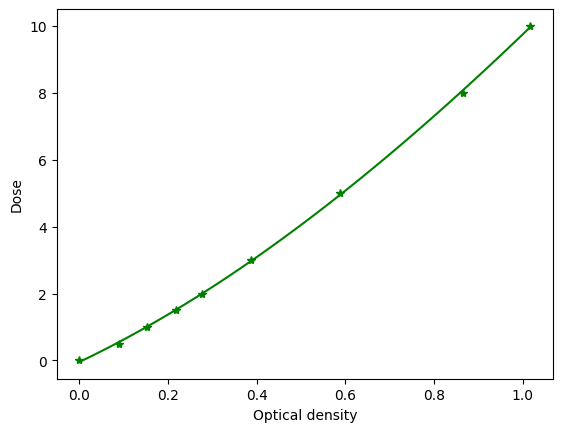

<Axes: xlabel='Optical density', ylabel='Dose'>

In [2]:
imparted_doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10]
cal = cal_image.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal.plot(color = 'green')

## Film to dose

In [3]:
# Laptop
#test_image_path = Path("/home/luis/Descargas") / "POS 11 SIN CARTULINA.tif"

# PC office
test_image_path = Path("/home/luis/Downloads") / "POS 11 SIN CARTULINA.tif"
test_image = load(test_image_path)

Number of images detected: 8


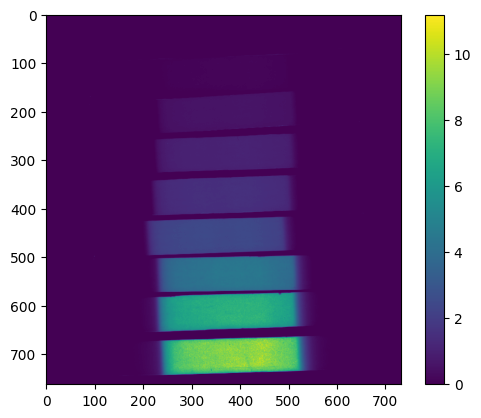

In [6]:
dose_img = test_image.to_dose(cal)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

### Test dose image

In [ ]:
from calibration import polynomial_g3
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters.rank import mean_percentile, mean
from skimage.morphology import disk, square

In [ ]:
footprint = square(3)
#for i in [0,1,2]:
#    test_image.array[:,:,i] = mean_percentile(test_image.array[:,:,i], footprint=footprint, p0=.05, p1=.95)

#test_image.array[:,:,1] = mean_percentile(test_image.array[:,:,1], footprint=footprint, p0=.05, p1=.95)
#test_image.array[:,:,1] = mean(test_image.array[:,:,1], footprint=footprint)

mean_pixel, std = test_image.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)

print("mean, standar deviation")
list(zip(mean_pixel, std))

In [ ]:
cal.popt # Coeficients used by the fit function.

In [ ]:
cal.optical_density

In [ ]:
-np.log10(np.array(mean_pixel)/mean_pixel[0])

In [ ]:
do_list = -np.log10(np.array(mean_pixel)/mean_pixel[0])

In [ ]:
dosis_from_fit = polynomial_g3(do_list, *cal.popt)
dosis_from_fit[dosis_from_fit < 0] = 0 # Remove doses < 0

In [ ]:
dosis_from_fit

### Difference

In [ ]:
for i in range(9,2,-1):
    print(f"Film {i}: {100*(dosis_from_fit[i-2] - imparted_doses[i-1])/imparted_doses[i-1]:.1f} %")


### Dose image

In [ ]:
optical_density = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

dose_image = polynomial_g3(optical_density, *cal.popt)
dose_image[dose_image < 0] = 0 # Remove doses < 0

In [ ]:
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_image)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

In [ ]:
do = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

plt.hist(do.ravel())

### Mean channel

In [ ]:
cal_mean = cal_image.get_calibration(doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10], channel = "mean", field_in_film = True)
cal_mean.plot(color = 'k')

In [ ]:
test_image = load(test_image_path)

ref, _ = test_image.get_stat(ch = "mean", field_in_film = True, ar = 0.4, show = True)
ref = sorted(ref, reverse = True)

In [ ]:
dosis_list = -np.log10(np.array(ref)/ref[0])
polynomial_g3(dosis_list, *cal.popt)

In [ ]:
from image import load

In [ ]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a_img = load(a, filter = 3)

In [ ]:
a_img.array

In [ ]:
from skimage.morphology import square

square(3)